In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

import random
import copy

# Part 1.

## Task 1.1 - Data Preparation
 - Data normalisation
 - Separation of data

In [2]:
containers = np.genfromtxt('containers.csv', delimiter=",", dtype=str)

In [3]:
targets = np.array(containers[:,7], dtype=int) #Extracting capacity
training = np.concatenate((containers[:,1:7], containers[:,8:]), axis=1) #Removing ID for confusion and capacity

In [4]:
""" Preparing the data """
scaler = MinMaxScaler()
scaled = np.copy(training)
scaled[:,1:] = scaler.fit_transform(scaled[:,1:])
pca = PCA(n_components = 3)
compressed = pca.fit_transform(scaled[:,1:])

In [5]:
""" Separating the data into testing and training """
xtrain, xtest, ytrain, ytest = train_test_split(scaled, targets, random_state = 100)

## Task 1.2 - Regression
 - Top 10
 - Forest Regressor
 - MLP Regressor
 - SVM Regressor

In [25]:
"""Combines names and capacities and then sorts them in ascending order and prints the 10 greatest values"""
def Top10(output):
  values=[]
  names = np.array(scaled[:,:1])
  for i in range(100):
    values.append([output[i],names[i]])
  top10 = sorted(values, reverse=True)[:10]
  print("Top 10 values")
  for i in range(10):
    print(i," ",top10[i][1], "= ", top10[i][0])

In [26]:
"""Forest Regressor"""
forest=RandomForestRegressor()
forest.fit(xtrain[:,1:],ytrain)
forestoutput=forest.predict(scaled[:,1:])
Top10(forestoutput)

Top 10 values
0   ['HMM STOCKHOLM'] =  22966.48
1   ['HMM HELSINKI'] =  22966.48
2   ['COSCO SHIPPING UNIVERSE'] =  21059.07
3   ['OOCL HONG KONG'] =  20985.13
4   ['CMA CGM ANTOINE DE SAINT EXUPERY'] =  20693.33
5   ['MILAN MAERSK'] =  20574.93
6   ['ONE TRIBUTE'] =  20418.22
7   ['MOL TREASURE'] =  20346.82
8   ['COSCO SHIPPING CAPRICORN'] =  19769.94
9   ['AL DAHNA'] =  19602.97


In [27]:
"""Neural Network"""
mlp=MLPRegressor(max_iter=10000,solver="lbfgs")
mlp.fit(xtrain[:,1:],ytrain)
mlpoutput=mlp.predict(scaled[:,1:].astype(float))
Top10(mlpoutput)

Top 10 values
0   ['HMM STOCKHOLM'] =  23434.465728788145
1   ['HMM HELSINKI'] =  23276.072708273892
2   ['CMA CGM ANTOINE DE SAINT EXUPERY'] =  21413.626245948955
3   ['COSCO SHIPPING UNIVERSE'] =  21297.338378861732
4   ['MILAN MAERSK'] =  20871.226104294194
5   ['ONE TRIBUTE'] =  20747.9183371476
6   ['MOL TREASURE'] =  20500.304773519718
7   ['OOCL HONG KONG'] =  20442.19459894126
8   ['COSCO SHIPPING CAPRICORN'] =  19697.889495690648
9   ['MSC RIFAYA'] =  19452.391721158936


In [28]:
"""Support Vector Machine"""
svm=SVR()
svm.fit(xtrain[:,1:],ytrain)
svmoutput=svm.predict(scaled[:,1:])
Top10(svmoutput)

Top 10 values
0   ['MSC OSCAR'] =  8563.941874298103
1   ['OOCL HONG KONG'] =  8563.876108505765
2   ['MOL TREASURE'] =  8563.804518574369
3   ['ONE TRIBUTE'] =  8563.769495283299
4   ['AL DAHNA'] =  8563.679748897082
5   ['COSCO SHIPPING CAPRICORN'] =  8563.672634434728
6   ['MSC RIFAYA'] =  8563.65458235482
7   ['CSCL GLOBE'] =  8563.610478384517
8   ['MSC HAMBURG'] =  8563.573745763457
9   ['MAERSK MC-KINNEY MOLLER'] =  8563.095080070514


## Task 1.3 - Assessment of Regression
 - Running Regressors
 - Boxplots for results

In [10]:
"""Forest"""
ftrain = mean_squared_error(forest.predict(xtrain[:,1:]),ytrain)
ftest = mean_squared_error(forest.predict(xtest[:,1:]),ytest)
print("Random Forest: \nExpected (training): ", ftrain,"   Actual (Test):", ftest, "\n")

"""MLP"""
mtrain = mean_squared_error(mlp.predict(xtrain[:,1:].astype(float)),ytrain)
mtest = mean_squared_error(mlp.predict(xtest[:,1:].astype(float)),ytest)
print("Neural Network: \nExpected (training): ", mtrain, "   Actual (Test):", mtest, "\n")

"""SVM"""
strain = mean_squared_error(svm.predict(xtrain[:,1:]),ytrain)
stest = mean_squared_error(svm.predict(xtest[:,1:]),ytest)
print("Support Vector Machine: \nExpected (training): ", strain, "   Actual (Test):", ftest, "\n")

Random Forest: 
Expected (training):  78603.45919866672    Actual (Test): 146825.82996000006 

Neural Network: 
Expected (training):  93356.19152805186    Actual (Test): 114661.47691472345 

Support Vector Machine: 
Expected (training):  41185416.16051672    Actual (Test): 146825.82996000006 



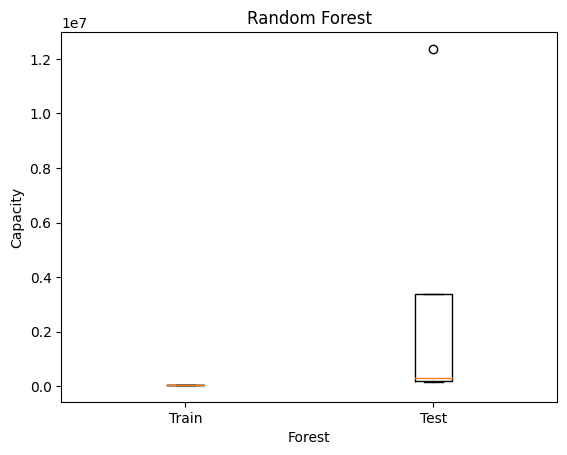

In [11]:
bp = []
bp1 = []
kf = KFold(n_splits=4)

"""Creates boxplots for each regressor"""

#Random Forest
for train, test in kf.split(training):
 x_test = training[test,1:]
 x_train = training[train,1:]
 y_test = targets[test]
 y_train = targets[train]
 forest.fit(x_train, y_train)
 pred_x = forest.predict(x_train)
 mse = mean_squared_error(pred_x, y_train)
 bp.append(mse)
 pred_y = forest.predict(x_test)
 mse1 = mean_squared_error(pred_y, y_test)
 bp1.append(mse1)

#Generate graph
plt.figure()
plt.boxplot([bp, bp1], labels=['Train','Test'])
plt.xlabel('Forest')
plt.ylabel('Capacity')
plt.title('Random Forest')
plt.savefig('Random Forest')
plt.show()


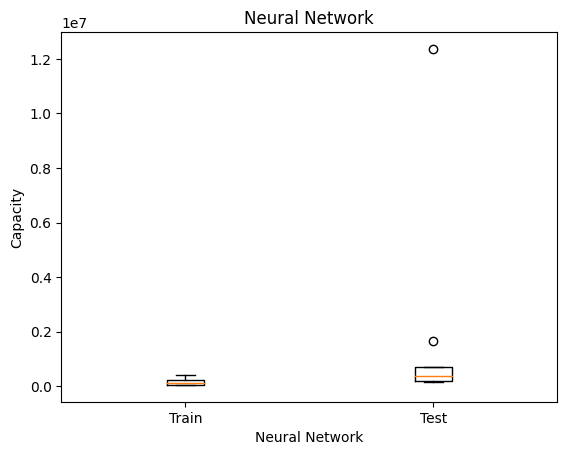

In [12]:
#Neural Network
for train, test in kf.split(training):
 x_test = training[test,1:]
 x_train = training[train,1:]
 y_test = targets[test]
 y_train = targets[train]
 mlp.fit(x_train.astype(float), y_train.astype(float))
 pred_x = mlp.predict(x_train.astype(float))
 mse = mean_squared_error(pred_x, y_train)
 bp.append(mse)
 pred_y = mlp.predict(x_test.astype(float))
 mse1 = mean_squared_error(pred_y, y_test)
 bp1.append(mse1)

#Generate graph
plt.figure()
plt.boxplot([bp, bp1], labels=['Train','Test'])
plt.xlabel('Neural Network')
plt.ylabel('Capacity')
plt.title('Neural Network')
plt.show()

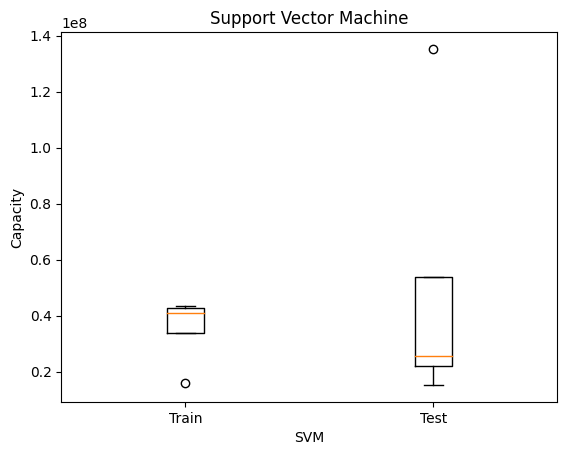

In [13]:
kf = KFold(n_splits=4)
bp = []
bp1 = []

#Support Vector Machine
for train, test in kf.split(training):
 x_test = training[test,1:]
 x_train = training[train,1:]
 y_test = targets[test]
 y_train = targets[train]
 svm.fit(x_train.astype(float), y_train)
 pred_x = svm.predict(x_train)
 mse = mean_squared_error(pred_x, y_train)
 bp.append(mse)
 pred_y = svm.predict(x_test)
 mse1 = mean_squared_error(pred_y, y_test)
 bp1.append(mse1)

#Generate graph
plt.figure()
plt.boxplot([bp, bp1], labels=['Train','Test'])
plt.xlabel('SVM')
plt.ylabel('Capacity')
plt.title('Support Vector Machine')
plt.show()

# Part 2

## Part 2.1 - Generation of random solutions
 - Creates a random solution
 - Fitness Function

In [14]:
distances = np.genfromtxt('distances.csv', delimiter=",", dtype=str)
stops = np.genfromtxt('stops.csv', delimiter=",", dtype=str)

In [15]:
locations = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

"""Prepares the stops for the optimisation """
def Randomise(data):
  random.shuffle(data)
  data = np.split(data, 3)
  return np.array(data)

In [16]:
"""Iterates through the solution and creates a fitness value of the result """

def FitnessFunction(arr):
  results = []
  for i in range(len(arr)):
    for j in range(len(arr[i])):
      if j+1 >= len(arr[i]):
        length = float(distances[arr[i][j]][arr[i][0]])
      else:
        length = float(distances[arr[i][j]][arr[i][j+1]])
      results.append(length)
  fitness = sum(results)
  return fitness

FitnessFunction(Randomise(locations))

68.3402480885748

## Part 2.2 - Algorithm Implementation
 - Swap Mutator
 - Shuffle Mutator
 - Ruin and Recreate Mutator
 - Hillclimber to test solutions

In [17]:
""" 
    Swap Mutator
    Takes two random values in the route and swaps them
"""
def Swap(solution):
  arr = solution.flatten()
  x = random.randint(0,11)
  y = random.randint(0,11)
  valid = True
  while valid:
    if x == y:
      x = random.randint(0,11)
    else:
      valid = False
  arr[x], arr[y] = arr[y], arr[x]
  arr = arr.reshape(3, 4)
  return arr

In [18]:
""" 
    Shuffle Mutator
    Takes 4 consecutive stops and randomises them
"""

def Shuffle(solution):
  arr = solution.flatten()
  x = random.randint(0,11)
  y = x
  values = []
  for i in range(4):
    if x+i > 11:
      x = -i
    values.append(arr[x+i])
  j = 0
  random.shuffle(values)
  for i in range(4):
    if y+i > 11:
      y = -i
    arr[y+i] = values[j]
    j += 1
  arr = arr.reshape(3, 4)
  return arr

Shuffle(Randomise(locations))

array([[ 2,  0, 10, 11],
       [ 9,  3,  5,  1],
       [ 7,  4,  6,  8]])

In [19]:
""" 
    Ruin and Recreate Mutator
    Destroys original solution and recreates it
"""
def Ruin(arr):
  return Randomise(locations)

Ruin(Randomise(locations))

array([[ 5,  9,  7,  1],
       [ 6,  2, 10,  8],
       [ 3,  0, 11,  4]])

In [20]:
"""Runs the solution again and if the child solution is better store the new value"""

def Hillclimber(solution,repeats,iterations,mutator):
  output = [[] for _ in range(repeats)]
  for i in range(repeats):
    x = copy.deepcopy(solution)
    y = FitnessFunction(x)

    for j in range(iterations):
      xp = mutator(x)
      yp = FitnessFunction(xp)

      if yp <= y:
        x = xp
        y = yp
      output[i].append(y)
  return output

In [21]:
mutators = [Swap, Shuffle, Ruin]

def Iterate(mutators):
  total = []
  results = []
  best = 0
  for i in range(len(mutators)):
    total.append(FitnessFunction(mutators[i](Randomise(locations))))

  # Works out which mutator is best for this iteration
  if total[0] < total[1]:
    if total[0] < total[2]:
      best = total[0]
      name = "Swap"
    else:
      best = total[2]
      name = "Ruin"
  else:
    best = total[1]
    name = "Shuffle"
  print("The best overall is {} with the {} mutator.\n" .format(best, name))
  
for i in range(5):
  Iterate(mutators)

The best overall is 71.03512613152138 with the Shuffle mutator.

The best overall is 69.23334674753154 with the Swap mutator.

The best overall is 78.31813920444674 with the Shuffle mutator.

The best overall is 93.93813537157334 with the Ruin mutator.

The best overall is 93.75457569885279 with the Swap mutator.



## Part 2.3 - Visualisation of results
 - Runs hill climbers
 - Calculates minimum, maximum and average values
 - Represents results


In [22]:
"""Runs Hill climbers"""
swap = Swap(Randomise(locations))
swapoutput= Hillclimber(swap,30,500,mutators[0])

shuffle = Shuffle(Randomise(locations))
shuffleoutput = Hillclimber(shuffle,30,500,mutators[1])

ruin = Ruin(Randomise(locations))
ruinoutput = Hillclimber(ruin,30,500,mutators[2])

In [23]:
swap_min = []
swap_avg = []
swap_max = []
shuffle_min = []
shuffle_avg = []
shuffle_max = []
ruin_min = []
ruin_avg = []
ruin_max = []

""" Calculates minimum, maximum and average values for each iteration"""

def Averages(output, mutator):
  minimum = []
  average = []
  maximum = []
  for i in range(500):
    values = []
    for lst in output:
      values.append(lst[i])
    minimum.append(min(values))
    average.append(np.mean(values))
    maximum.append(max(values))
  return minimum, average, maximum

swap_min, swap_avg, swap_max = Averages(swapoutput, mutators[0])
shuffle_min, shuffle_avg, shuffle_max = Averages(shuffleoutput, mutators[1])
ruin_min, ruin_avg, ruin_max = Averages(ruinoutput, mutators[2])

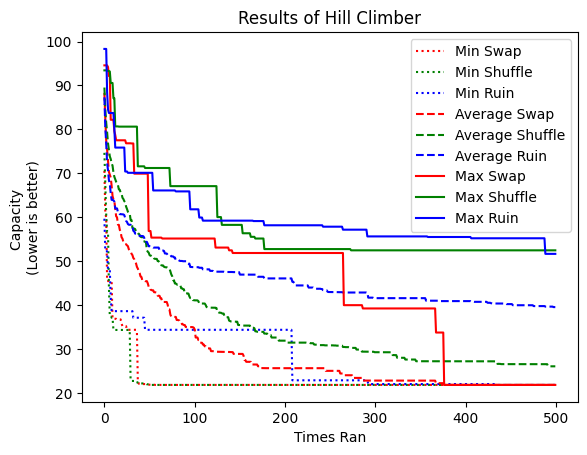

In [24]:
plt.plot(swap_min, linestyle = ':',color = 'r',label="Min Swap")
plt.plot(shuffle_min, linestyle = ':',color = 'g',label="Min Shuffle")
plt.plot(ruin_min, linestyle = ':',color = 'b',label="Min Ruin")

plt.plot(swap_avg, linestyle = '--',color = 'r',label="Average Swap")
plt.plot(shuffle_avg, linestyle = '--',color = 'g',label="Average Shuffle")
plt.plot(ruin_avg, linestyle = '--',color = 'b',label="Average Ruin")

plt.plot(swap_max, linestyle = '-',color = 'r',label="Max Swap")
plt.plot(shuffle_max, linestyle = '-',color = 'g',label="Max Shuffle")
plt.plot(ruin_max, linestyle = '-',color = 'b',label="Max Ruin")


plt.xlabel('Times Ran')
plt.ylabel('Capacity \n(Lower is better)')
plt.title('Results of Hill Climber')
plt.legend(loc='upper right')
plt.show()

## Swap
This solution is the best as the it quickly reaches the local minimum given that the result of the hillclimber is optimised faster than the other 2 algorithms.
While Ruin and Recreate reaches a more optimised result more consistently, the Swap mutator is a more efficient algorithm as it rapidly gets more optimised halfway through running the algorithm and then plateaus as it has reached the most optimal values. As the increased permutations has no effect on the result, it clearly is the most optimised solution.

